In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a CSV file named 'responses.csv'
df = pd.read_csv('combined_file.csv')
print(df.head())



           Song Video        Arousal and Valence            Timestamp  Score  \
0        Willow   NaN   High Valence Low Arousal  08/04/2024 18:02:56    NaN   
1         Zevia   NaN    Low Valence Low Arousal  08/04/2024 18:14:55    NaN   
2  Fall Out Boy   NaN   Low Valence High Arousal  08/04/2024 18:23:57    NaN   
3  Shake it Off   NaN  High Valence High Arousal  08/04/2024 18:33:10    NaN   
4        Willow   NaN   High Valence Low Arousal  08/04/2024 18:44:09    NaN   

               Name                                 Email  Gender   Age  \
0           Sherley  sherley.peethala@research.iiit.ac.in  Female  18.0   
1       Hemang Jain               hemangjain112@gmail.com    Male  19.0   
2   Vaishnavi Khule   Vaishnavi.khule@students.iiit.ac.in  Female  23.0   
3     Atharva Pande        atharva.pande@students.iiit.ac    Male  23.0   
4  Vedashree Ranade  vedashree.ranade@students.iiit.ac.in  Female  24.0   

   On a scale from 1 to 10, how would you rate the valence of the so

In [8]:
print(df.iloc[:,-1])

0                                   Frequent, Top Picks
1     Not very often , not at all infact becuse i li...
2     I dont listen this type of music much only few...
3     Almost all the time. Pop and heavy metal are t...
4                                        Not very often
5                                                Rarely
6                                  approx 15-20 per day
7     not very often. I listen to music while studyi...
8                                         almost always
9                                                Rarely
10                                           Frequently
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                                  NaN
Name: How often do you listen to this type of music?, dtype: object


In [9]:
def get_sentiment(text):
    # This function returns 'Yes' if the sentiment is positive, 'No' if it's negative or NaN
    if pd.isna(text):
        return 'No'
    return 'Yes' if TextBlob(str(text)).sentiment.polarity > 0 else 'No'

# Apply the function to the last column of the DataFrame to create the 'Prefer' column
df['Prefer'] = df.iloc[:, -1].apply(get_sentiment)


In [13]:
print(df.iloc[:,12])

0     9.0
1     6.0
2     7.0
3     7.0
4     9.0
5     9.0
6     2.0
7     7.0
8     8.0
9     8.0
10    9.0
11    NaN
12    NaN
13    NaN
14    NaN
Name: Rate the overall liking of the song on a scale from 1 to 10., dtype: float64


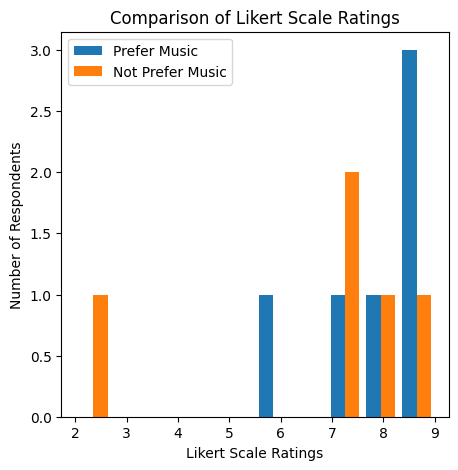

In [15]:
# Convert the Likert scale ratings to integers
df['Likert Scale'] = df.iloc[:,12]

# Separate the DataFrame into two groups based on the 'Prefer' column
prefer_music = df[df['Prefer'] == 'Yes']
not_prefer_music = df[df['Prefer'] == 'No']

# Plot a histogram comparing the Likert scale ratings of the two groups
plt.figure(figsize=(5, 5))
plt.hist([prefer_music['Likert Scale'], not_prefer_music['Likert Scale']], label=['Prefer Music', 'Not Prefer Music'])
plt.xlabel('Likert Scale Ratings')
plt.ylabel('Number of Respondents')
plt.title('Comparison of Likert Scale Ratings')
plt.legend()
plt.show()
